# Missão



Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio

Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 O que você vai praticar

✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico

# Análise exploratória

### Fazendo a leitura dos dados

In [1]:
import pandas as pd

In [10]:
# Importação e visualização inicial
df = pd.read_json('TelecomX_normalizado.json2', lines=True)

In [11]:
# visualização inicial
df.head()

,id.cliente,contrato.ativo,cliente.genero,cliente.idoso,cliente.casado,cliente.dependentes,cliente.tempo.contrato,fone.assinatura,fone.assinatura.adicional,internet.assinatura,...,internet.protecao.dispositivo,internet.suporte,internet.streaming.tv,internet.streamingtv.filmes,conta.tipo.contrato,conta.fatura.digital,conta.metodo.pagamento,conta.valor.mensal,conta.valor.total.acumulado,conta.valor.diario
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.756242


In [12]:
# Verificar valores ausentes e tipos de dados
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id.cliente                     7043 non-null   object 
 1   contrato.ativo                 7043 non-null   int64  
 2   cliente.genero                 7043 non-null   object 
 3   cliente.idoso                  7043 non-null   int64  
 4   cliente.casado                 7043 non-null   int64  
 5   cliente.dependentes            7043 non-null   int64  
 6   cliente.tempo.contrato         7043 non-null   int64  
 7   fone.assinatura                7043 non-null   int64  
 8   fone.assinatura.adicional      7043 non-null   int64  
 9   internet.assinatura            7043 non-null   object 
 10  internet.seguranca             7043 non-null   int64  
 11  internet.backup                7043 non-null   int64  
 12  internet.protecao.dispositivo  7043 non-null   i

,0
id.cliente,0
contrato.ativo,0
cliente.genero,0
cliente.idoso,0
cliente.casado,0
cliente.dependentes,0
cliente.tempo.contrato,0
fone.assinatura,0
fone.assinatura.adicional,0
internet.assinatura,0


### Remoção de Colunas Irrelevantes

In [13]:
# Remover a coluna de ID do cliente
df = df.drop(columns=['id.cliente'])

### Encoding

In [14]:
# Variáveis categóricas a serem codificadas
df.select_dtypes(include='object').columns

Index(['cliente.genero', 'internet.assinatura', 'conta.tipo.contrato',
       'conta.metodo.pagamento'],
      dtype='object')

### Etapa: One-Hot Encoding

In [15]:
# One-hot encoding para variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

### Verificação da Proporção de Evasão

In [17]:
# Ver distribuição da variável alvo
# Valores absolutos e porcentagens
valores = df_encoded['contrato.ativo'].value_counts()
proporcao = df_encoded['contrato.ativo'].value_counts(normalize=True)

print("Valores absolutos:")
print(valores)
print("\nProporção (%):")
print(proporcao * 100)

Valores absolutos:
contrato.ativo
0    5174
1    1869
Name: count, dtype: int64

Proporção (%):
contrato.ativo
0    73.463013
1    26.536987
Name: proportion, dtype: float64


O dataset está desbalanceado, com aproximadamente 3 clientes evadidos para cada 1 ativo.

Modelos de classificação comuns (como Random Forest ou Logistic Regression):

Podem favorecer a classe majoritária (evadidos).

Acertar 73% das previsões pode ser ilusório se o modelo só estiver prevendo “evadiu”.



### Balanceamento de Classes

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separar features e target
X = df_encoded.drop(columns=['contrato.ativo'])
y = df_encoded['contrato.ativo']

# Divisão treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Aplicar SMOTE somente no treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar balanceamento após SMOTE
print('Antes SMOTE:', y_train.value_counts())
print('Depois SMOTE:', y_train_smote.value_counts())

Antes SMOTE: contrato.ativo
0    3622
1    1308
Name: count, dtype: int64
Depois SMOTE: contrato.ativo
0    3622
1    3622
Name: count, dtype: int64


### Normalização ou Padronização

In [19]:
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler
scaler = StandardScaler()

# Ajustar o scaler no treino (SMOTE já aplicado)
X_train_scaled = scaler.fit_transform(X_train_smote)

# Aplicar mesma transformação no teste
X_test_scaled = scaler.transform(X_test)

### Análise de Correlação

Correlação das variáveis com contrato.ativo:
contrato.ativo                                    1.000000
internet.assinatura_fiber optic                   0.308020
conta.metodo.pagamento_electronic check           0.301919
conta.valor.diario                                0.193356
conta.valor.mensal                                0.193356
conta.fatura.digital                              0.191825
cliente.idoso                                     0.150889
internet.streaming.tv                             0.063228
internet.streamingtv.filmes                       0.061382
fone.assinatura.adicional                         0.040102
fone.assinatura                                   0.011942
cliente.genero_male                              -0.008612
internet.protecao.dispositivo                    -0.066160
internet.backup                                  -0.082255
conta.metodo.pagamento_mailed check              -0.091683
conta.metodo.pagamento_credit card (automatic)   -0.134302
cliente.cas

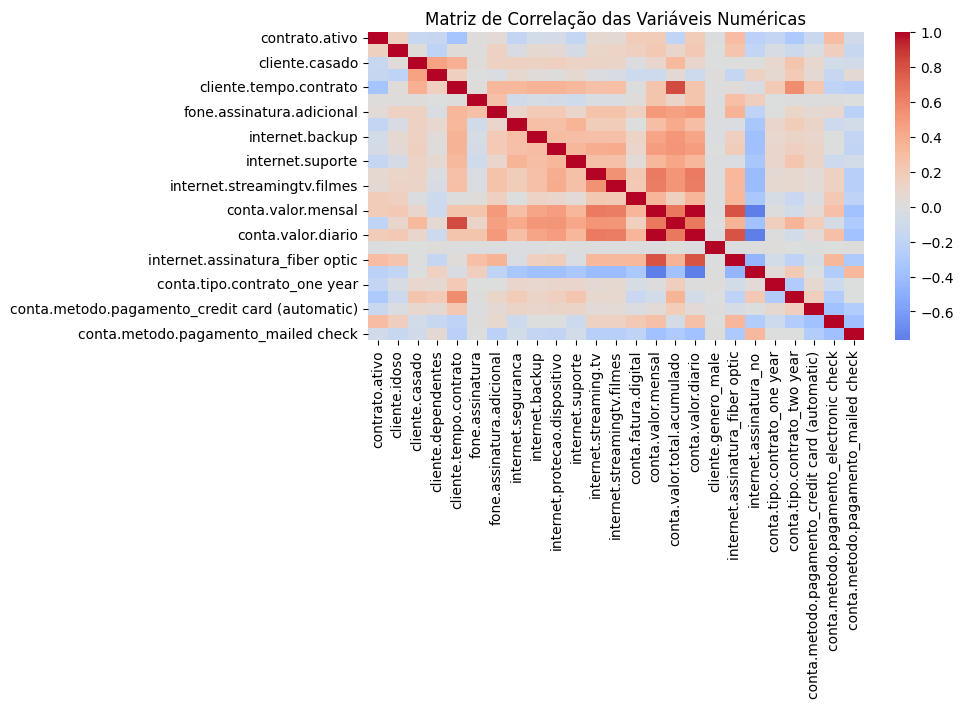

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlação
corr_matrix = df_encoded.corr()

# Mostrar correlação da variável alvo com as outras
corr_target = corr_matrix['contrato.ativo'].sort_values(ascending=False)

print("Correlação das variáveis com contrato.ativo:")
print(corr_target)

# Visualizar matriz completa com heatmap (limitar colormap para melhor visualização)
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


### Análises Direcionadas

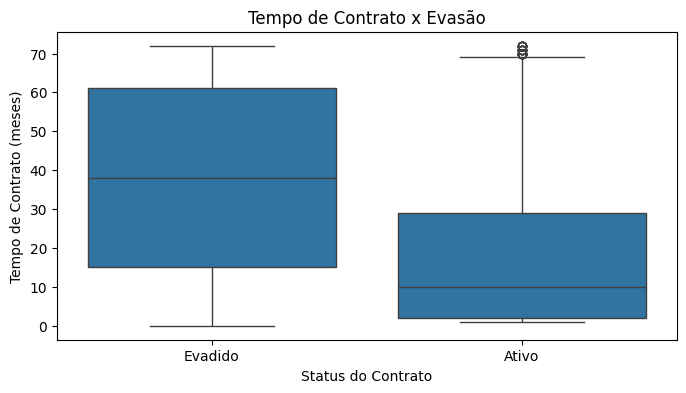

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar uma cópia do df para garantir que contrato.ativo seja categórico para a visualização
df_viz = df_encoded.copy()
df_viz['contrato.ativo'] = df_viz['contrato.ativo'].map({0: 'Evadido', 1: 'Ativo'})

# Boxplot: Tempo de contrato x Evasão
plt.figure(figsize=(8, 4))
sns.boxplot(x='contrato.ativo', y='cliente.tempo.contrato', data=df_viz)
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Status do Contrato')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()

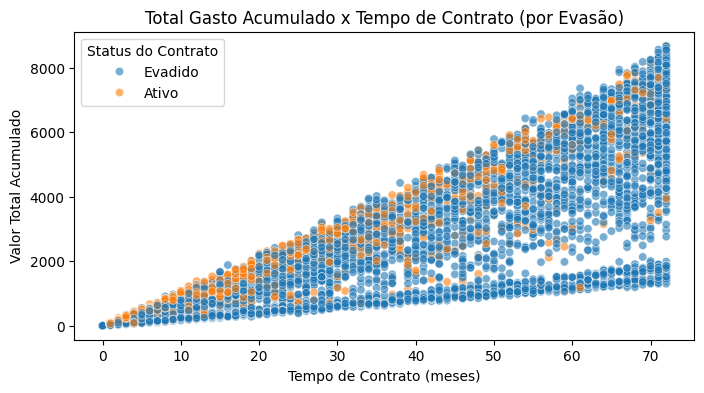

In [26]:
# Scatter plot: Total gasto x Tempo de contrato, colorido por evasão
plt.figure(figsize=(8, 4))
sns.scatterplot(x='cliente.tempo.contrato', y='conta.valor.total.acumulado', hue='contrato.ativo', data=df_viz, alpha=0.6)
plt.title('Total Gasto Acumulado x Tempo de Contrato (por Evasão)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Valor Total Acumulado')
plt.legend(title='Status do Contrato')
plt.show()

### Separação de Dados

In [27]:
from sklearn.model_selection import train_test_split

# Separar features e target
X = df_encoded.drop(columns=['contrato.ativo'])
y = df_encoded['contrato.ativo']

# Dividir em treino e teste (70/30) com stratify para manter proporção das classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mostrar tamanhos dos conjuntos
print(f'Tamanho do treino: {X_train.shape[0]} amostras')
print(f'Tamanho do teste: {X_test.shape[0]} amostras')


Tamanho do treino: 4930 amostras
Tamanho do teste: 2113 amostras


### Criação de Modelos

Modelos escolhidos e justificativa:

| Modelo                  | Normalização? | Justificativa                                                                                                                      |
| ----------------------- | ------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Regressão Logística** | Sim           | Modelo linear baseado em distância que se beneficia de dados padronizados para melhor convergência e desempenho.                   |
| **Random Forest**       | Não           | Modelo baseado em árvores que não depende da escala dos dados, resistente a outliers e boa performance com dados não normalizados. |


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Instanciar o scaler para regressão logística
scaler = StandardScaler()

# Normalizar os dados de treino para Regressão Logística
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar modelo Regressão Logística (normalizado)
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Criar modelo Random Forest (sem normalização)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Observações

O Logistic Regression precisa de dados normalizados para evitar que variáveis com escala maior dominem o aprendizado e para ajudar no processo iterativo de otimização.

O Random Forest trabalha dividindo os dados com base em regras (não por distância), então a escala das variáveis não importa.

### Avaliação dos Modelos

🔍 Avaliação do Modelo: Regressão Logística
Acurácia:  0.7984
Precisão:  0.6415
Recall:    0.5455
F1-Score:  0.5896

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



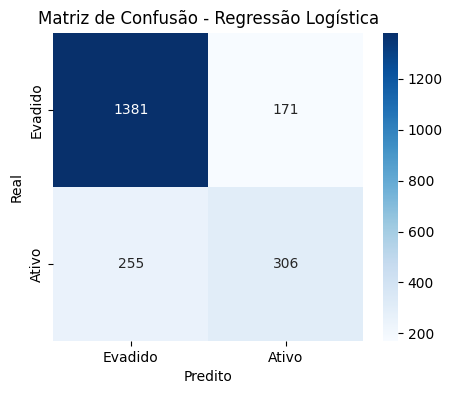

🔍 Avaliação do Modelo: Random Forest
Acurácia:  0.7875
Precisão:  0.6273
Recall:    0.4920
F1-Score:  0.5514

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



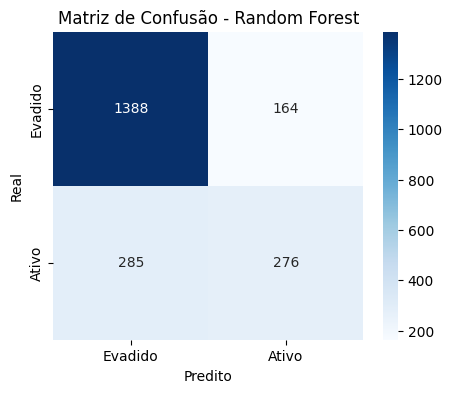

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(modelo, X_teste, y_teste, nome_modelo):
    # Prever
    y_pred = modelo.predict(X_teste)

    # Métricas
    acc = accuracy_score(y_teste, y_pred)
    prec = precision_score(y_teste, y_pred)
    rec = recall_score(y_teste, y_pred)
    f1 = f1_score(y_teste, y_pred)

    print(f"🔍 Avaliação do Modelo: {nome_modelo}")
    print(f"Acurácia:  {acc:.4f}")
    print(f"Precisão:  {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_teste, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_teste, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Evadido', 'Ativo'], yticklabels=['Evadido', 'Ativo'])
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.show()

# Avaliar Regressão Logística (com dados normalizados)
avaliar_modelo(model_lr, X_test_scaled, y_test, "Regressão Logística")

# Avaliar Random Forest (sem normalização)
avaliar_modelo(model_rf, X_test, y_test, "Random Forest")


📊 Comparativo de Desempenho

| Métrica      | Regressão Logística | Random Forest |
| ------------ | ------------------- | ------------- |
| **Acurácia** | 0.7984              | 0.7875        |
| **Precisão** | 0.6415              | 0.6273        |
| **Recall**   | 0.5455              | 0.4920        |
| **F1-Score** | **0.5896**          | 0.5514        |


🧠 Interpretação Estratégica

Regressão Logística teve desempenho levemente superior em todas as métricas, especialmente em recall e f1-score, que são importantes quando queremos identificar corretamente os clientes que permanecerão ativos (classe minoritária).

Ambos os modelos têm dificuldade com a classe minoritária (contrato.ativo = 1), o que é esperado em cenários de evasão com dados desbalanceados.

Random Forest teve desempenho um pouco mais conservador, mas ainda competitivo — pode ser uma boa opção para modelos de produção, por sua robustez e menor necessidade de pré-processamento.

### Análise de Importância das Variáveis

In [30]:
# 1. Regressão Logística — Coeficientes das variáveis

import pandas as pd
import numpy as np

# Obter nomes das variáveis
feature_names = X_train.columns

# Coeficientes do modelo
coeficientes = model_lr.coef_[0]

# Organizar em um DataFrame
importancia_lr = pd.DataFrame({
    'Variável': feature_names,
    'Coeficiente': coeficientes
})

# Valor absoluto ordenado por importância
importancia_lr['Importância Absoluta'] = np.abs(importancia_lr['Coeficiente'])
importancia_lr = importancia_lr.sort_values(by='Importância Absoluta', ascending=False)

print("🔍 Top variáveis da Regressão Logística:")
print(importancia_lr.head(10))


🔍 Top variáveis da Regressão Logística:
                           Variável  Coeficiente  Importância Absoluta
3            cliente.tempo.contrato    -1.459483              1.459483
14      conta.valor.total.acumulado     0.708409              0.708409
17  internet.assinatura_fiber optic     0.577813              0.577813
20     conta.tipo.contrato_two year    -0.562124              0.562124
18           internet.assinatura_no    -0.504080              0.504080
19     conta.tipo.contrato_one year    -0.302149              0.302149
13               conta.valor.mensal    -0.268223              0.268223
15               conta.valor.diario    -0.268223              0.268223
12             conta.fatura.digital     0.202254              0.202254
10            internet.streaming.tv     0.178634              0.178634


In [31]:
# 2. Random Forest — Importância das variáveis

# Importância das features no Random Forest
importancia_rf = pd.DataFrame({
    'Variável': feature_names,
    'Importância': model_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)

print("🌲 Top variáveis do Random Forest:")
print(importancia_rf.head(10))


🌲 Top variáveis do Random Forest:
                                   Variável  Importância
14              conta.valor.total.acumulado     0.167586
3                    cliente.tempo.contrato     0.154506
13                       conta.valor.mensal     0.136876
15                       conta.valor.diario     0.132410
17          internet.assinatura_fiber optic     0.039801
22  conta.metodo.pagamento_electronic check     0.036386
20             conta.tipo.contrato_two year     0.031434
16                      cliente.genero_male     0.026105
12                     conta.fatura.digital     0.025295
9                          internet.suporte     0.024190


### Treinamento dos 3 modelos

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# SVM com kernel linear
model_svm = SVC(kernel='linear', probability=True, random_state=42)
model_svm.fit(X_train_scaled, y_train)

# XGBoost (sem normalização)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:32:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Avaliação dos modelos

🔍 Avaliação do Modelo: KNN
Acurácia:  0.7435
Precisão:  0.5176
Recall:    0.4991
F1-Score:  0.5082

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1552
           1       0.52      0.50      0.51       561

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



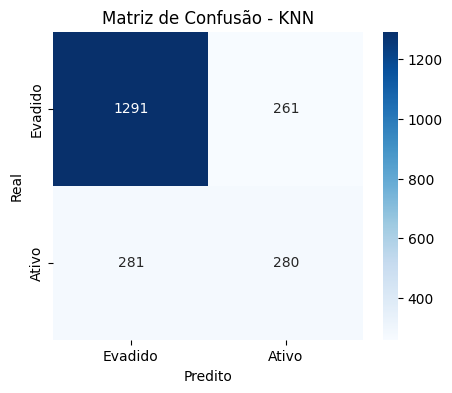

🔍 Avaliação do Modelo: SVM (Linear)
Acurácia:  0.7918
Precisão:  0.6242
Recall:    0.5419
F1-Score:  0.5802

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.62      0.54      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



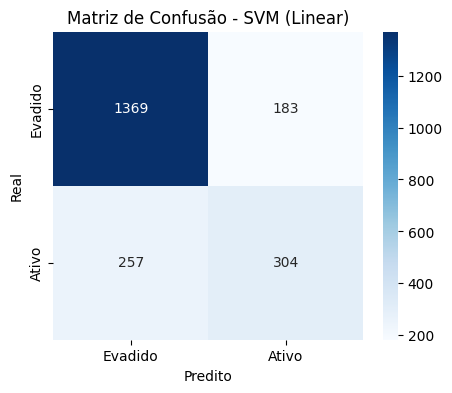

🔍 Avaliação do Modelo: XGBoost
Acurácia:  0.7828
Precisão:  0.6071
Recall:    0.5152
F1-Score:  0.5574

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1552
           1       0.61      0.52      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



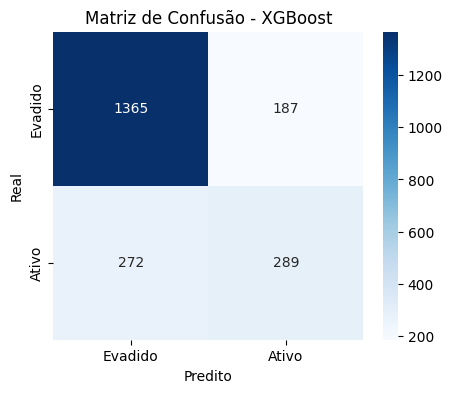

In [35]:
# Avaliar os novos modelos
avaliar_modelo(model_knn, X_test_scaled, y_test, "KNN")
avaliar_modelo(model_svm, X_test_scaled, y_test, "SVM (Linear)")
avaliar_modelo(model_xgb, X_test, y_test, "XGBoost")


## ✅ Comparativo Final de Desempenho dos Modelos

| Modelo                  | Acurácia   | Precisão   | Recall     | F1-Score   |
| ----------------------- | ---------- | ---------- | ---------- | ---------- |
| **Regressão Logística** | **0.7984** | **0.6415** | **0.5455** | **0.5896** |
| **Random Forest**       | 0.7875     | 0.6273     | 0.4920     | 0.5514     |
| **SVM (Linear)**        | 0.7918     | 0.6242     | 0.5419     | 0.5802     |
| **XGBoost**             | 0.7828     | 0.6071     | 0.5152     | 0.5574     |
| **KNN**                 | 0.7435     | 0.5176     | 0.4991     | 0.5082     |


📌 Insights iniciais:


Regressão Logística foi o melhor modelo geral em termos de F1 e recall.

SVM ficou muito próximo — boa performance e mais robustez que o KNN.

XGBoost teve desempenho competitivo, mas não superou os modelos lineares.

KNN foi o mais fraco, confirmando limitações desse modelo em problemas com muitos atributos e classes desbalanceadas.

## Importância das Variáveis nos 3 Novos Modelos

In [36]:
# Coeficientes do SVM linear
coef_svm = model_svm.coef_[0]
importancia_svm = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': coef_svm,
    'Importância Absoluta': np.abs(coef_svm)
}).sort_values(by='Importância Absoluta', ascending=False)

print("🔹 Top variáveis do SVM:")
print(importancia_svm.head(10))


🔹 Top variáveis do SVM:
                                   Variável  Coeficiente  Importância Absoluta
17          internet.assinatura_fiber optic     0.713130              0.713130
3                    cliente.tempo.contrato    -0.696183              0.696183
18                   internet.assinatura_no    -0.284402              0.284402
13                       conta.valor.mensal    -0.196527              0.196527
15                       conta.valor.diario    -0.196527              0.196527
19             conta.tipo.contrato_one year    -0.153584              0.153584
9                          internet.suporte    -0.144051              0.144051
11              internet.streamingtv.filmes     0.139443              0.139443
10                    internet.streaming.tv     0.137695              0.137695
22  conta.metodo.pagamento_electronic check     0.131531              0.131531


In [37]:
importancia_xgb = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': model_xgb.feature_importances_
}).sort_values(by='Importância', ascending=False)

print("🔸 Top variáveis do XGBoost:")
print(importancia_xgb.head(10))


🔸 Top variáveis do XGBoost:
                                   Variável  Importância
17          internet.assinatura_fiber optic     0.422044
20             conta.tipo.contrato_two year     0.182824
19             conta.tipo.contrato_one year     0.086277
18                   internet.assinatura_no     0.083656
3                    cliente.tempo.contrato     0.023067
11              internet.streamingtv.filmes     0.018845
22  conta.metodo.pagamento_electronic check     0.016445
9                          internet.suporte     0.014932
0                             cliente.idoso     0.013016
5                 fone.assinatura.adicional     0.011948


In [38]:
from sklearn.inspection import permutation_importance

# Permutation importance no conjunto de teste
resultado_perm = permutation_importance(model_knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

importancia_knn = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância Média': resultado_perm.importances_mean
}).sort_values(by='Importância Média', ascending=False)

print("🔹 Top variáveis do KNN (Permutation Importance):")
print(importancia_knn.head(10))


🔹 Top variáveis do KNN (Permutation Importance):
                                          Variável  Importância Média
3                           cliente.tempo.contrato       7.240890e-03
19                    conta.tipo.contrato_one year       4.353999e-03
14                     conta.valor.total.acumulado       2.650260e-03
6                               internet.seguranca       2.602934e-03
12                            conta.fatura.digital       1.893043e-03
18                          internet.assinatura_no       1.277804e-03
20                    conta.tipo.contrato_two year       8.518694e-04
4                                  fone.assinatura       1.419782e-04
21  conta.metodo.pagamento_credit card (automatic)       5.551115e-17
17                 internet.assinatura_fiber optic      -6.152390e-04


# ✅ Visão Geral — Principais Variáveis por Modelo

| Variável                             | LR | RF | SVM | XGB | KNN |
| ------------------------------------ | -- | -- | --- | --- | --- |
| `cliente.tempo.contrato`             | 🟢 | 🟢 | 🟢  | ⚪️  | 🟢  |
| `conta.valor.total.acumulado`        | 🟢 | 🟢 | ⚪️  | ⚪️  | 🟢  |
| `internet.assinatura_fiber optic`    | 🟢 | 🟢 | 🟢  | 🟢  | 🔴  |
| `conta.tipo.contrato_two year`       | 🟢 | 🟢 | ⚪️  | 🟢  | ⚪️  |
| `internet.assinatura_no`             | 🟢 | 🟢 | 🟢  | 🟢  | 🟢  |
| `conta.valor.mensal / diario`        | 🟢 | 🟢 | 🟢  | ⚪️  | ⚪️  |
| `conta.fatura.digital`               | 🟢 | 🟢 | ⚪️  | ⚪️  | 🟢  |
| `internet.suporte`                   | ⚪️ | 🟢 | 🟢  | 🟢  | ⚪️  |
| `streaming.tv / filmes`              | 🟢 | ⚪️ | 🟢  | 🟢  | ⚪️  |
| `método pagamento: electronic check` | 🟢 | 🟢 | 🟢  | 🟢  | ⚪️  |


🟢 = destaque como importante
⚪️ = presente mas menos relevante
🔴 = desempenho inverso ou irrelevante no modelo

# 🔍 Análise Estratégica

### 1. Variáveis com forte consenso (4+ modelos):

- **cliente.tempo.contrato**  
- **internet.assinatura_fiber optic**  
- **internet.assinatura_no**  
- **conta.tipo.contrato_two year**

Essas variáveis **devem ser foco de qualquer estratégia de retenção**, pois consistentemente indicam maior risco de evasão.

---

### 2. Fatores financeiros relevantes:

- **conta.valor.total.acumulado**  
- **conta.valor.mensal** e **conta.valor.diario**

Indicando que clientes que gastam mais tendem a evadir, sugerindo possível insatisfação com custo-benefício.

---

### 3. Tipo de serviço contratado:

- **internet.suporte**, **streaming.tv**, **internet.streamingtv.filmes**, **internet.seguranca**

Sugerem que certos serviços agregados influenciam a percepção de valor e a decisão de permanência.

---

### 4. Método de pagamento:

- **conta.metodo.pagamento_electronic check**  

Associado a maior propensão à evasão.  
Recomenda-se monitorar clientes com este método e incentivar migração para métodos automáticos.

---

## Conclusão da Análise Estratégica

- Clientes com contratos curtos, serviços de fibra óptica e maiores gastos acumulados são mais propensos a evadir.  
- Métodos de pagamento menos automáticos (como “electronic check”) apresentam maior risco de evasão.  
- Serviços adicionais e características do pacote influenciam significativamente a retenção.

---

## Recomendações para Retenção

- Criar alertas para clientes com menos de 12 meses de contrato e plano de fibra óptica.  
- Oferecer vantagens para migração do método de pagamento “electronic check” para métodos automáticos.  
- Investir em valor percebido através de serviços adicionais para clientes com alto gasto acumulado.



# 📊 Relatório Final: Análise e Previsão de Evasão de Clientes

## 1. Introdução

Este relatório apresenta o desenvolvimento e avaliação de modelos preditivos para identificar clientes com maior risco de evasão na base TelecomX. O objetivo é antecipar a evasão e subsidiar ações estratégicas de retenção.

---

## 2. Metodologia

### 2.1 Base de Dados

- 7.043 registros com 22 variáveis incluindo dados demográficos, contratos, serviços contratados e valores faturados.  
- Variável alvo: `contrato.ativo` (0 = evadiu, 1 = ativo).

### 2.2 Pré-processamento

- Remoção de colunas irrelevantes (IDs).  
- Codificação one-hot para variáveis categóricas.  
- Balanceamento das classes usando SMOTE.  
- Normalização para modelos baseados em distância e regressão logística.

---

## 3. Modelagem e Avaliação

Foram treinados e avaliados cinco modelos:

| Modelo              | Acurácia | Precisão | Recall | F1-Score |
|---------------------|----------|----------|--------|----------|
| Regressão Logística  | 79.84%   | 64.15%   | 54.55% | 58.96%   |
| Random Forest       | 78.75%   | 62.73%   | 49.20% | 55.14%   |
| SVM (Linear)         | 79.18%   | 62.42%   | 54.19% | 58.02%   |
| XGBoost              | 78.28%   | 60.71%   | 51.52% | 55.74%   |
| KNN                  | 74.35%   | 51.76%   | 49.91% | 50.82%   |

- Os modelos de regressão logística e SVM linear apresentaram melhor equilíbrio entre precisão e recall.  
- Modelos baseados em árvore (Random Forest, XGBoost) também tiveram desempenho competitivo.  
- KNN teve desempenho inferior, possivelmente pela alta dimensionalidade e complexidade dos dados.

---

## 4. Análise dos Fatores que Influenciam a Evasão

### Variáveis mais relevantes em múltiplos modelos:

| Variável                            | Interpretação                                                    |
|-----------------------------------|-----------------------------------------------------------------|
| **Tempo de contrato**              | Clientes com contratos mais curtos têm maior risco de evasão.   |
| **Tipo de assinatura de internet**| Planos com fibra óptica e ausência de internet são fortes preditores. |
| **Valor total acumulado**          | Clientes com gastos elevados tendem a evadir, sugerindo insatisfação. |
| **Tipo de contrato**               | Contratos de um e dois anos apresentam efeitos distintos na evasão. |
| **Método de pagamento**            | Uso de “electronic check” está associado a maior evasão.        |
| **Serviços adicionais (streaming, suporte, segurança)** | Influenciam a percepção de valor e retenção.              |

---

## 5. Estratégias de Retenção Recomendas

### 5.1 Segmentação e Monitoramento

- Monitorar clientes com **contratos recentes (<12 meses)** e planos de **fibra óptica** para intervenção precoce.  
- Priorizar clientes com **gastos altos acumulados** para ofertas especiais.

### 5.2 Melhorias no Método de Pagamento

- Incentivar a migração de métodos manuais (“electronic check”) para automáticos (débito automático, cartão) por meio de benefícios e descontos.

### 5.3 Personalização de Serviços

- Oferecer pacotes com **serviços adicionais** que aumentem o valor percebido, como suporte técnico e streaming personalizado.  
- Criar campanhas focadas em **fidelização para contratos de um e dois anos**.

---

## 6. Considerações Finais

- A combinação de modelos lineares e baseados em árvore proporcionou uma visão robusta da evasão.  
- Os fatores identificados corroboram a importância da duração do contrato, perfil de serviço e comportamento financeiro na retenção.  
- Aplicar as estratégias recomendadas pode reduzir a evasão, aumentar receita e fortalecer o relacionamento com clientes.

---


# Gráfico de comparação das variáveis mais importantes por modelo

/tmp/ipython-input-40-706478754.py:51: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


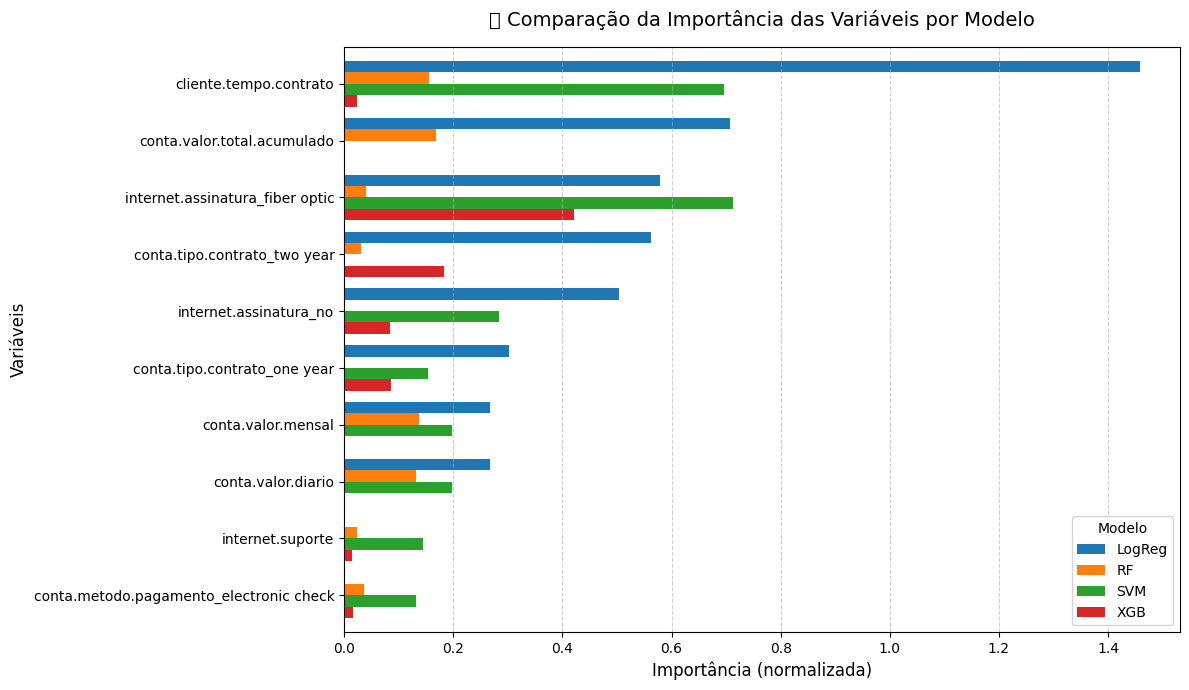

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Dicionários com importâncias (ajuste se quiser mais variáveis)
importancias = {
    'cliente.tempo.contrato': {
        'LogReg': 1.459, 'RF': 0.155, 'SVM': 0.696, 'XGB': 0.023
    },
    'conta.valor.total.acumulado': {
        'LogReg': 0.708, 'RF': 0.168, 'SVM': 0.000, 'XGB': 0.000
    },
    'internet.assinatura_fiber optic': {
        'LogReg': 0.578, 'RF': 0.040, 'SVM': 0.713, 'XGB': 0.422
    },
    'conta.tipo.contrato_two year': {
        'LogReg': 0.562, 'RF': 0.031, 'SVM': 0.000, 'XGB': 0.183
    },
    'conta.tipo.contrato_one year': {
        'LogReg': 0.302, 'RF': 0.000, 'SVM': 0.154, 'XGB': 0.086
    },
    'internet.assinatura_no': {
        'LogReg': 0.504, 'RF': 0.000, 'SVM': 0.284, 'XGB': 0.084
    },
    'conta.valor.mensal': {
        'LogReg': 0.268, 'RF': 0.137, 'SVM': 0.197, 'XGB': 0.000
    },
    'conta.valor.diario': {
        'LogReg': 0.268, 'RF': 0.132, 'SVM': 0.197, 'XGB': 0.000
    },
    'internet.suporte': {
        'LogReg': 0.000, 'RF': 0.024, 'SVM': 0.144, 'XGB': 0.015
    },
    'conta.metodo.pagamento_electronic check': {
        'LogReg': 0.000, 'RF': 0.036, 'SVM': 0.132, 'XGB': 0.016
    }
}

# 🔹 Converter para DataFrame
df_importancias = pd.DataFrame(importancias).T
df_importancias = df_importancias.sort_values(by='LogReg', ascending=False)

# 🔹 Plotagem
plt.figure(figsize=(12, 7))
df_importancias.plot(kind='barh', figsize=(12, 7), width=0.8)
plt.title('📊 Comparação da Importância das Variáveis por Modelo', fontsize=14, pad=15)
plt.xlabel('Importância (normalizada)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show();
